In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df = df[['Age','EstimatedSalary','Purchased']]

In [4]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [6]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [7]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_scaled.shape

(400, 2)

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [11]:
model = Sequential()
model.add(Dense(10, activation = 'relu', input_dim = 2))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])
start = time.time()
history = model.fit(X_scaled , y, epochs = 500, batch_size = 1, validation_split = 0.2) # batch size = 1 mane ekhane Stochastic Gradient Descent use kora hoyeche.
print('time required to run the code: ',time.time() - start)

# output e training data 320 dekhacche karon amra validation split diye 20 % data alada kore niyechi.

Epoch 1/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.8033 - loss: 0.5445 - val_accuracy: 0.6750 - val_loss: 0.6243
Epoch 2/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.8426 - loss: 0.3810 - val_accuracy: 0.7125 - val_loss: 0.5731
Epoch 3/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - accuracy: 0.8417 - loss: 0.3262 - val_accuracy: 0.7125 - val_loss: 0.5092
Epoch 4/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.8461 - loss: 0.3281 - val_accuracy: 0.7500 - val_loss: 0.4419
Epoch 5/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - accuracy: 0.8438 - loss: 0.3080 - val_accuracy: 0.8625 - val_loss: 0.3898
Epoch 6/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 0.8368 - loss: 0.2849 - val_accuracy: 0.8875 - val_loss: 0.3579
Epoch 7/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.8215 - loss: 0.3173 - val_accuracy: 0.9250 - val_loss: 0.3395
Epoch 8/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.8722 - loss: 0

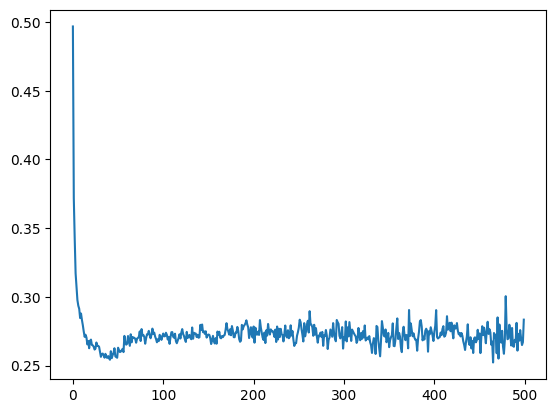

In [13]:
# Plot for stochastic gradient descent

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.show()

In [14]:
# for batch gradient descent

model = Sequential()

model.add(Dense(10, activation = 'relu' , input_dim = 2))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [15]:
model.compile(loss= 'binary_crossentropy', metrics = ['accuracy'])
start = time.time()
history = model.fit(X_scaled , y , epochs = 10, batch_size = 250, validation_split = 0.2) # batch size = 250 use korechi, mane eta mini batch gradient descent , Batch gradient descent er jonno sob training data(320) use korte hobe batch size e.
print('Time required to run the code: ',time.time() - start)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7083 - loss: 0.6861 - val_accuracy: 0.3625 - val_loss: 0.8457
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7123 - loss: 0.6684 - val_accuracy: 0.3625 - val_loss: 0.8360
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7097 - loss: 0.6619 - val_accuracy: 0.3625 - val_loss: 0.8298
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7150 - loss: 0.6470 - val_accuracy: 0.3625 - val_loss: 0.8224
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7017 - loss: 0.6468 - val_accuracy: 0.3625 - val_loss: 0.8208
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7163 - loss: 0.6325 - val_accuracy: 0.3625 - val_loss: 0.8136
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7083 - loss: 0.6265 - val_accuracy: 0.3625 - val_loss: 0.8102
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7097 - loss: 0.6228 - val_accuracy: 0.3625 - val_loss: 0.8053


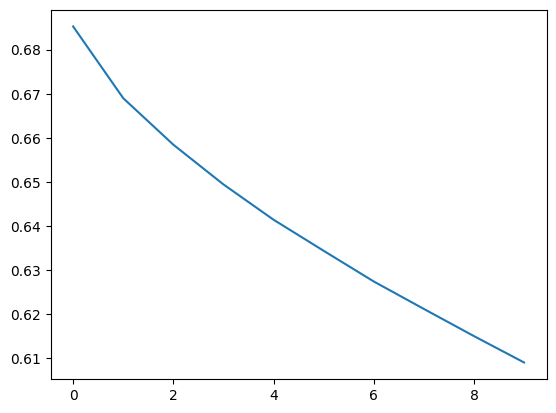

In [16]:
plt.plot(history.history['loss'])
plt.show()